# NLP Lecture 1

## 1. Rule Based AI Paradigm

In [79]:
%matplotlib inline

import random
import collections
import numpy as np
import matplotlib.pyplot as plt

In [1]:
hello_rules = """
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
"""

[Python Grammar specification](https://docs.python.org/3/reference/grammar.html)

In [2]:
import random

def get_generation_by_gram(grammar_str, target, stmt_split='=', or_split='|'):
    def generate(grammar_rule, target):
        if target in grammar_rule:
            candidate = random.choice(grammar_rule[target])
            return ''.join([generate(grammar_rule, c) for c in candidate.split()])
        else:
            return target

    # parse grammar rule
    rules = {}
    for line in grammar_str.split('\n'):
        line = line.strip()

        if not line: continue

        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split('|')

    return generate(rules, target)
    

In [3]:
get_generation_by_gram(hello_rules, 'say_hello')

'MikeMike你好呀'

In [4]:
simple_programming = """
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var => char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
"""

In [5]:
for i in range(3):
    print(get_generation_by_gram(simple_programming, 'if_stmt', '=>'))

if(acd){if(3d<1){bdbcb=c}}
if(c<=a){c=2c}
if(1<=a){c=2}
if(20cd<=d){if(02b1){c=aaca}}
if(b<=1){if(32a<c3){b30ab3ad=3aba}}


## 2. Probability Based AI Paradigm

### 全概率公式和贝叶斯准则

**全概率公式**

设A1, A2, ..., An是一组互不相容的事件，形成样本空间的一个分割（每个实验结果必定使得其中一个事件发生）。又假设对于每一个i, P(Ai) > 0，则对于任何事件B，下列公式成立

$$P(B) = P(A_1)P(B|A_1) + ... + P(A_n)P(B|A_n)$$

**贝叶斯准则**

设A1, A2, ... , An是一组互不相容的事件，形成样本空间的一个分割（每一个实验结果必定使得其中一个事件发生）。又假定对于每一个i,P(Ai) > 0. 则对于任何事件B，只要它满足P(B) > 0，下列公式成立

$$P(A_i|B) = \frac {P(A_i)P(B|A_i)}{P(A_1)P(B|A_1) + ... + P(A_n)P(B|A_n)}$$

### Language Model

The probability of sentence.

Input: Sentence (w1, w2, ..., wn)

Outpu: Probability

$$P(sentence) = P(w_1, w_2, ... , w_n)$$

2-gram language model

$$P(w_{i+1}|w_i) = \frac {C(w_{i+1}, w_i)}{C(w_i)}$$

$$P(sentence)= P(w_1, w_2, ... , w_n) = P(w_1|w_2) ... P(w_{n-1}|w_n) = \prod \frac {C(w_{i+1}, w_i)}{C(w_i)}$$

In [17]:
# 语料数据

corpus = '/Users/hotbaby/code/github/jupyters_and_slides/2019-autumn/article_9k.txt'

In [19]:
FILE = open(corpus).read()

In [22]:
len(FILE)

33425826

In [124]:
FILE[:1000]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄大屏旗舰的设定有关按照目前掌握的资料一加手机5拥有55寸1080P三星AMOLED显示屏6G8GBRAM64GB128GBROM双1600万摄像头备货量惊喜根据京东泄露的信息一加5起售价是xx99元应该是在279928992999中的某个\n这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄\n原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上身行走在南坪快速上期间还起了轻生年头一辅警发现后赶紧为其披上黄衣并一路劝说她那么事发时到底都发生了些什么呢南都记者带您一起还原现场南都记者在龙岗大队坂田中队见到了辅警刘青发现女生的辅警一位外表高大帅气说话略带些腼腆的90后青年刘青介绍6月16日早上7时36分他正在环城南路附近值勤接到中队关于一位女子裸身进入机动车可能有危险的警情随后骑着小铁骑开始沿路寻找大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子女子身上一丝不挂地逆车流而行时走时停时坐时躺险象环生刘青停好小铁骑和另外一名巡防员追了上去发现女子的情绪很低落话不多刘青尝试和女子交流劝说女子离开可女

In [82]:
# 分词

import jieba

max_length = 1000 * 1000
sub_file = FILE[:max_length]

def cut(string):
    return list(jieba.cut(string))

TOKENS = cut(sub_file)

In [112]:
import collections

words_count = collections.Counter(TOKENS)
_1_gram_count = words_count
words_count.most_common(10)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960)]

In [54]:
words_with_fre = [f for w, f in words_count.most_common()]

words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

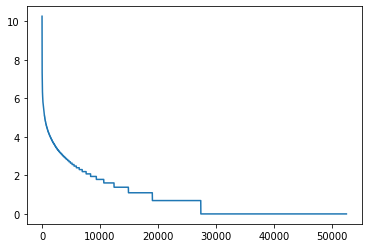

In [66]:
plt.plot(np.log(words_with_fre))

**大量文本中，出现次数第二多的单词，出现的频率是频率最高单词的1/2，出现频率第三高的单词，频率是最高单词频率的1/3**

In [81]:
print(cut('清华大学是中国高等学府之一'))
print(cut('清华大学是中国最好的大学之一'))

['清华大学', '是', '中国', '高等学府', '之一']
['清华大学', '是', '中国', '最好', '的', '大学', '之一']


In [93]:
TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [99]:
_2_gram_words = [ TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS) - 1)]

_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [104]:
_2_gram_word_count = collections.Counter(_2_gram_words)

_2_gram_word_count.most_common()[:3]

[('6月', 1173), ('的是', 362), ('也是', 298)]

In [105]:
def get_2_gram_count(word):
    if word in _2_gram_word_count:
        return _2_gram_word_count[word]
    else:
        return _2_gram_word_count.most_common()[-1][-1]    # out of vocabulary OOV

In [110]:
print(get_2_gram_count('的是'))
print(get_2_gram_count('oov'))


362
1


$$P(sentence) = P(w_1, w_2, ... , w_n) = \prod \frac {Count(w_{i+1}, w_i)}{Count(w_i)}$$

In [2]:
# 2-gram language model

def get_gram_count(token, words_count):
    if token in words_count:
        return words_count[token]
    else:
        return words_count.most_common()[-1][-1]


def two_gram_model(sentence):
    tokens = cut(sentence)

    prob = 1
    for i in range(len(tokens) - 1):
        token = tokens[i]
        next_token = tokens[i+1]

        _two_gram_count = get_gram_count(token+next_token, _2_gram_word_count)
        _one_gram_count = get_gram_count(token, _1_gram_count)

    prob *= _two_gram_count / _one_gram_count

    return prob

In [3]:
print(two_gram_model('我今天很开心'))
print(two_gram_model('我毕业于清华大学'))
print(two_gram_model('中午吃放了嘛你'))
print(two_gram_model('中国几张这个电影很不错'))
print(two_gram_model('兵者，国之大事，死生之地，存亡之道，不可不察也'))

NameError: name 'cut' is not defined

优化：

1. 更多的数据，More Data, Better Result
2. 改进模型, 2-gram => 3-gram